<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/Widen00-Lab5/Lab5/Widen00_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Differential Equations**
**Joel Widén**

# **Abstract**

Differential equations is the cornerstone of connecting math, physics and science. They are used to describe changes of systems in space and time, but also more abstract systems can be modelled using these.

This report is investigating the time dependant differential equations, both scalar and systems of differential equations.

# **About the code**

This is a report in the course DD2363 Methods in Scientific Computing. The author of this file is Joel Widén, joelwid@kth.se.

In [72]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *

#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Numbered algorithms, equations and chapter references used in this report is from the DD2363 course book Methods in Computational Science by Johan Hoffman if not stated otherwise.

This will be done by solving the following assignments:

**Assignment 1:** Function: Time stepping for scalar initial value problem $du/dt = f(u,t)$

* *Input:* final time $T$, function $f(u,t)$, initial value $u(0)$
* *Output:* approximation $U(t_n)$ for the time interval $[0,T]$
* *Test:* verify accuracy and stability with respect to model problem.

**Assignment 2:** Function: Time stepping for a system of  initial value problems $du/dt = f(u,t)$

* *Input:* final time $T$, function $f(u,t)$, initial value $u(0)$
* *Output:* approximation $U(t_n)$ for the time interval $[0,T]$
* *Test:* verify accuracy and stability with respect to model problem.

# **Method**

**Assignment 1**



<Figure size 640x480 with 0 Axes>

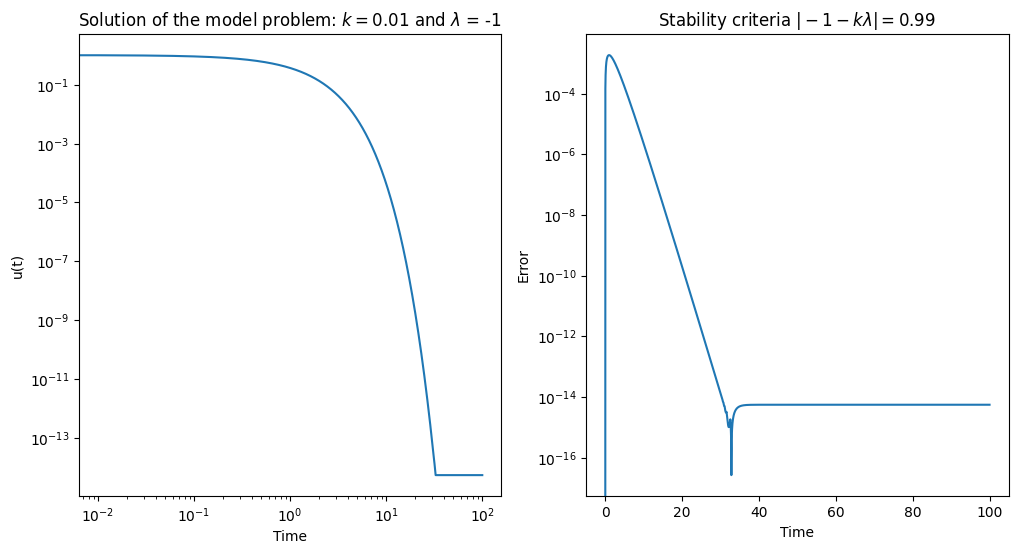

<Figure size 640x480 with 0 Axes>

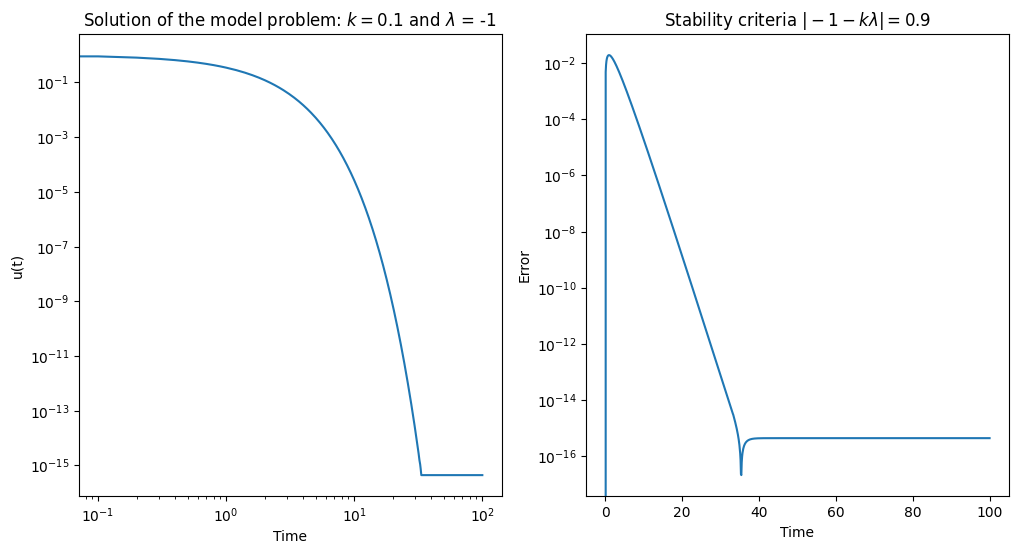

<Figure size 640x480 with 0 Axes>

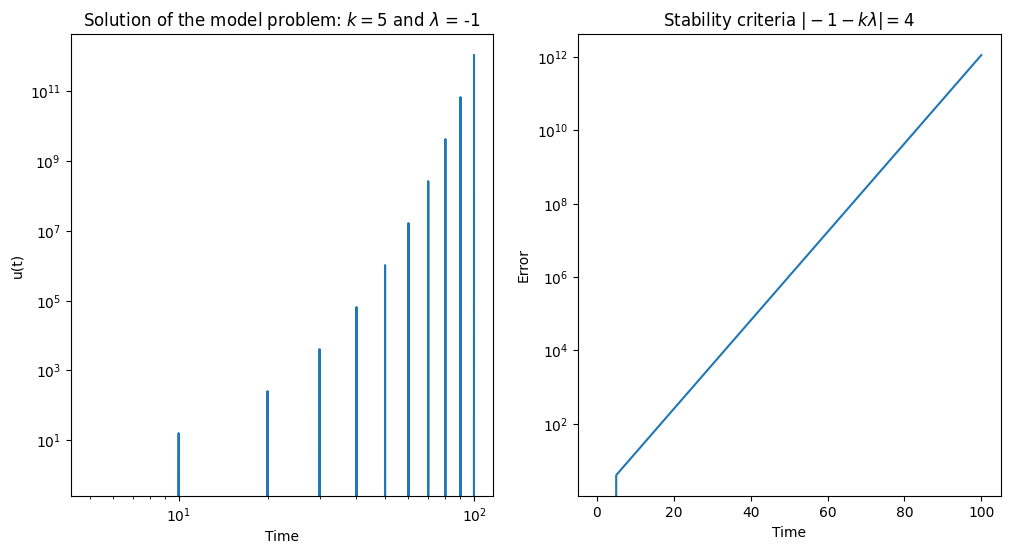

In [148]:
#Assignment 1
class Par:
  def __init__(self, u0, t0, k, theta, f, p, T):
    self.u0 = u0
    self.t0 = t0
    self.k = k
    self.theta = theta
    self.f = f
    self.p = p
    self.T = T

def fun(u, t, p):
  f = p * u
  return f

def newtons_method(fu, u0, t, par):
  u = u0
  TOL = 10**-3
  while abs(fu(u, t, par)) > TOL:
    df = 1 - par.p * par.k*(1-par.theta)
    u = u - (fu(u, t, par)/df)
  return u

def theta_func(u, t, par):
  f = u - par.u0 - par.k*((1-par.theta)*par.f(u, t, par.p) + par.theta*par.f(par.u0, par.t0, par.p))
  return f

def scalar_time(T, f, u0, k):
  t0 = 0
  t = t0
  dec = int(-1*np.log10(k))
  p = -1
  theta = 1   #0.5=trap, 1=expl, eul, 0=impl, eul
  par = Par(u0, t0, k, theta, f, p, T)
  u_vec = np.zeros(int(T/k)+1)
  u_vec[0] = u0
  i = 1
  while t < T:
    u = newtons_method(theta_func, u0, t, par)
    par.u0 = u
    t = round(t + k, dec+1)
    u_vec[i] = u
    #print(t)
    i += 1
  return u_vec, par


#p is lambda in the course material
k_vec = [0.01, 0.1, 5]

for j in range(len(k_vec)):
  T = 100
  u0 = 1;
  u_vec, par = scalar_time(T, fun, u0, k_vec[j])

  #Stability for explicit euler
  stab_crit = abs(-1 - k_vec[j]*par.p)

  t_vec = np.arange(par.t0, par.T + par.k, par.k)

  exact_sol_vec = np.zeros(len(t_vec))
  for i in range(len(t_vec)):
    exact_sol_vec[i] = float(u0 * np.exp(par.p*t_vec[i]))

  error = np.abs(exact_sol_vec - u_vec)

  plt.figure(i)
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  plt.loglog(t_vec, u_vec)
  plt.xlabel("Time")
  plt.ylabel("u(t)")
  plt.title("Solution of the model problem: $k = $" + str(k_vec[j]) + " and $\lambda$ = " + str(par.p))
  plt.subplot(122)
  plt.semilogy(t_vec, error)
  plt.xlabel("Time")
  plt.ylabel("Error")
  plt.title("Stability criteria $|-1 - k\lambda| = $" + str(stab_crit))
  plt.show()


**Assignment 2**

*TODO*

In [ ]:
#Assignment 2

class Par:
  def __init__(self, u0, t0, k, theta, f, p, T):
    self.u0 = u0
    self.t0 = t0
    self.k = k
    self.theta = theta
    self.f = f
    self.p = p
    self.T = T

def fun(u, t, p):
  f = p * u
  return f

def newtons_method(fu, u0, t, par):
  u = u0
  TOL = 10**-3
  while abs(fu(u, t, par)) > TOL:
    df = 1 - par.p * par.k*(1-par.theta)
    u = u - (fu(u, t, par)/df)
  return u

def theta_func(u, t, par):
  f = u - par.u0 - par.k*((1-par.theta)*par.f(u, t, par.p) + par.theta*par.f(par.u0, par.t0, par.p))
  return f

def system_time(T, f, u0, k):
  t0 = 0
  t = t0
  dec = int(-1*np.log10(k))
  p = np.array[[0, 1],[-1, 0]]
  theta = 1   #0.5=trap, 1=expl, eul, 0=impl, eul
  par = Par(u0, t0, k, theta, f, p, T)
  u_vec = np.zeros(int(T/k)+1)
  u_vec[0] = u0
  i = 1
  while t < T:
    u = newtons_method(theta_func, u0, t, par)
    par.u0 = u
    t = round(t + k, dec+1)
    u_vec[i] = u
    #print(t)
    i += 1
  return u_vec, par


#p is lambda in the course material
k_vec = [0.01, 0.1, 5]

for j in range(len(k_vec)):
  T = 100
  u0 = [1, 1];
  u_vec, par = system_time(T, fun, u0, k_vec[j])

  #Stability for explicit euler
  stab_crit = abs(-1 - k_vec[j]*par.p)

  t_vec = np.arange(par.t0, par.T + par.k, par.k)

  exact_sol_vec = np.zeros(len(t_vec))
  for i in range(len(t_vec)):
    exact_sol_vec[i] = float(u0 * np.exp(par.p*t_vec[i]))

  error = np.abs(exact_sol_vec - u_vec)

  plt.figure(i)
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  plt.loglog(t_vec, u_vec)
  plt.xlabel("Time")
  plt.ylabel("u(t)")
  plt.title("Solution of the model problem: $k = $" + str(k_vec[j]) + " and $\lambda$ = " + str(par.p))
  plt.subplot(122)
  plt.semilogy(t_vec, error)
  plt.xlabel("Time")
  plt.ylabel("Error")
  plt.title("Stability criteria $|-1 - k\lambda| = $" + str(stab_crit))
  plt.show()



# **Results**

# **Discussion**

The stability of the scalar function follows the theory in chapter 13.4 which says that the method should be stable for $|-1 - k\lambda| < 1$. The last figure of the scalar problem shows that the method is not stable for that combination.

The accuracy of the scalar problem is scaling as expected. According to chapter 13.5 the global error should decrease with the same factor that the timestep decreases with which can be seen for the figures with $k=0.1$ and $k=0.01$.